In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')


In [2]:
# =========================================
# 1. IMPORT LIBRARIES
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For inline plots in Jupyter
%matplotlib inline

In [4]:
cd drive/MyDrive/Geospatial Dashboard/

/content/drive/MyDrive/Geospatial Dashboard


In [5]:
# =========================================
# 2. LOAD DATA
# =========================================
df = pd.read_csv("Crime_Incidents_in_2024.csv")

In [6]:
# =========================================
# 3. INITIAL DATA INSPECTION
# =========================================
# View basic info
print("DataFrame Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types & Non-Null Counts:")
print(df.info())
print("\nSample Rows:")
display(df.head())


DataFrame Shape: (29295, 25)

Columns:
 Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

Data Types & Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29295 non-null  float64
 1   Y                     29295 non-null  float64
 2   CCN                   29295 non-null  int64  
 3   REPORT_DAT            29295 non-null  object 
 4   SHIFT                 29295 non-null  object 
 5   METHOD                29295 non-null  object 
 6   OFFENSE               29295 non-null  object 
 7   BLOCK       

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.27,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.91,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.55,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.11,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN


In [7]:
# =========================================
# 4. SUMMARY STATISTICS
# =========================================
# Describe numerical columns
print("\nSummary Statistics (Numerical):")
display(df.describe())


Summary Statistics (Numerical):


,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,29295.000000,29295.000000,2.929500e+04,29295.000000,29295.000000,29291.000000,28550.000000,28827.000000,29280.000000,29295.000000,29295.000000,2.929500e+04,0.0
mean,399281.365189,137801.454601,2.412673e+07,399281.365190,137801.454601,4.393602,3.703292,374.842994,7521.588081,38.908067,-77.008292,6.666143e+08,NaN
std,3032.291061,3344.181869,1.624752e+05,3032.291061,3344.181868,2.322873,1.841980,183.751097,34736.612847,0.030124,0.034962,1.575541e+05,NaN
min,390362.150000,127300.240000,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.111162,6.662134e+08,NaN
25%,397229.000000,136234.280000,2.405873e+07,397229.000006,136234.280000,2.000000,2.000000,207.000000,3500.000000,38.893930,-77.031952,6.665412e+08,NaN
50%,399029.030000,137856.980000,2.411504e+07,399029.030000,137856.979997,5.000000,4.000000,401.000000,7202.000000,38.908569,-77.011192,6.666663e+08,NaN
75%,401206.777300,139815.115000,2.416641e+07,401206.777279,139815.115000,6.000000,5.000000,506.000000,9102.000000,38.926188,-76.986094,6.667370e+08,NaN
max,407806.750900,147365.030000,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,980000.000000,38.994217,-76.910012,6.667763e+08,NaN


In [8]:
# Describe object (categorical) columns
obj_cols = df.select_dtypes(include=["object"]).columns
print("\nSummary of Categorical Columns:")
for col in obj_cols:
    print(f"{col} --> Unique Values: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False).head(5))  # Show top 5 most frequent
    print("-----")


Summary of Categorical Columns:
REPORT_DAT --> Unique Values: 29241
REPORT_DAT
2024/10/07 04:00:00+00    4
2024/02/14 05:00:00+00    4
2024/08/03 04:00:00+00    3
2024/05/22 04:00:00+00    3
2024/10/06 04:00:00+00    3
Name: count, dtype: int64
-----
SHIFT --> Unique Values: 3
SHIFT
EVENING     11848
DAY         11508
MIDNIGHT     5939
Name: count, dtype: int64
-----
METHOD --> Unique Values: 3
METHOD
OTHERS    26706
GUN        2174
KNIFE       415
Name: count, dtype: int64
-----
OFFENSE --> Unique Values: 9
OFFENSE
THEFT/OTHER                   13016
THEFT F/AUTO                   6678
MOTOR VEHICLE THEFT            5130
ROBBERY                        2109
ASSAULT W/DANGEROUS WEAPON     1025
Name: count, dtype: int64
-----
BLOCK --> Unique Values: 7123
BLOCK
3100 - 3299 BLOCK OF 14TH STREET NW       451
2000 - 2099 BLOCK OF 8TH STREET NW        200
1400 - 1499 BLOCK OF P STREET NW          168
812 - 899 BLOCK OF BLADENSBURG ROAD NE    155
1737 - 1776 BLOCK OF COLUMBIA ROAD NW     148

In [9]:
# =========================================
# 5. CHECK FOR MISSING VALUES
# =========================================
print("\nMissing Values by Column:")
missing_counts = df.isnull().sum()
print(missing_counts)


Missing Values by Column:
X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
LATITUDE                    0
LONGITUDE                   0
BID                     23881
START_DATE                  6
END_DATE                 2095
OBJECTID                    0
OCTO_RECORD_ID          29295
dtype: int64


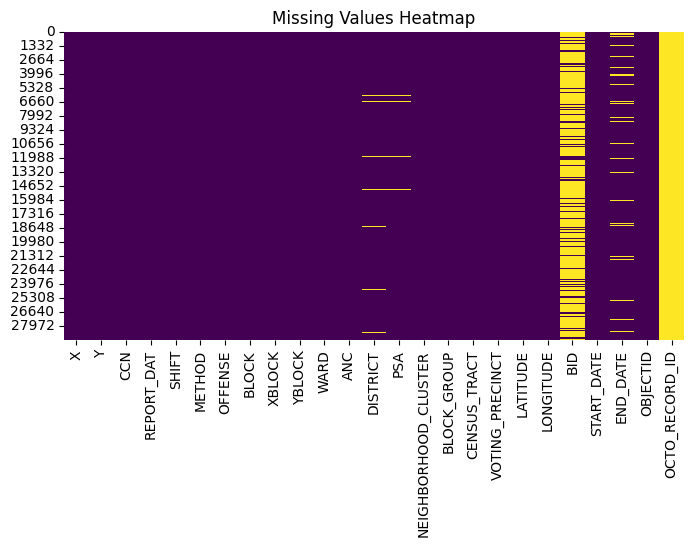

In [10]:
# Visualize missing data with a heatmap:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [11]:
# =========================================
# 6. CHECK FOR DUPLICATES
# =========================================
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# to drop duplicates:
# df.drop_duplicates(inplace=True)


Number of Duplicate Rows: 0


In [12]:
# =========================================
# 7. DATA CLEANING EXAMPLES
# =========================================
# --- 7a. Convert date columns to datetime
# Adjust the column names if they differ in your dataset
date_cols = ["REPORT_DAT", "START_DATE", "END_DATE"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [13]:
# --- 7b. Standardize text columns (strip and lower)
text_cols = ["SHIFT", "METHOD", "OFFENSE", "BID"]
for col in text_cols:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].str.strip().str.lower()

In [14]:
# Re-check data types after conversions
print("\nData Types After Cleaning:")
print(df.info())


Data Types After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   X                     29295 non-null  float64            
 1   Y                     29295 non-null  float64            
 2   CCN                   29295 non-null  int64              
 3   REPORT_DAT            29295 non-null  datetime64[ns, UTC]
 4   SHIFT                 29295 non-null  object             
 5   METHOD                29295 non-null  object             
 6   OFFENSE               29295 non-null  object             
 7   BLOCK                 29295 non-null  object             
 8   XBLOCK                29295 non-null  float64            
 9   YBLOCK                29295 non-null  float64            
 10  WARD                  29291 non-null  float64            
 11  ANC                   29291 non-null  o

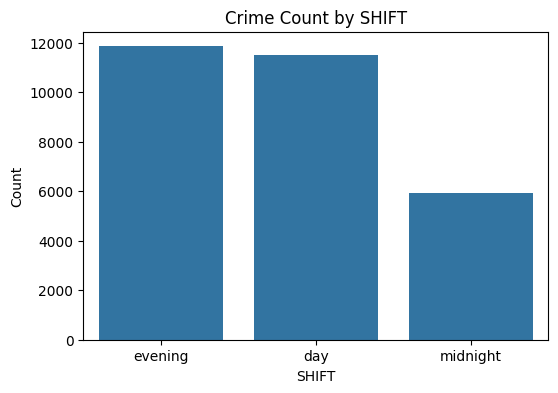

In [15]:
# =========================================
# 8. UNIVARIATE ANALYSIS
# =========================================
# --- 8a. SHIFT distribution
if "SHIFT" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="SHIFT", data=df, order=df["SHIFT"].value_counts().index)
    plt.title("Crime Count by SHIFT")
    plt.xlabel("SHIFT")
    plt.ylabel("Count")
    plt.show()

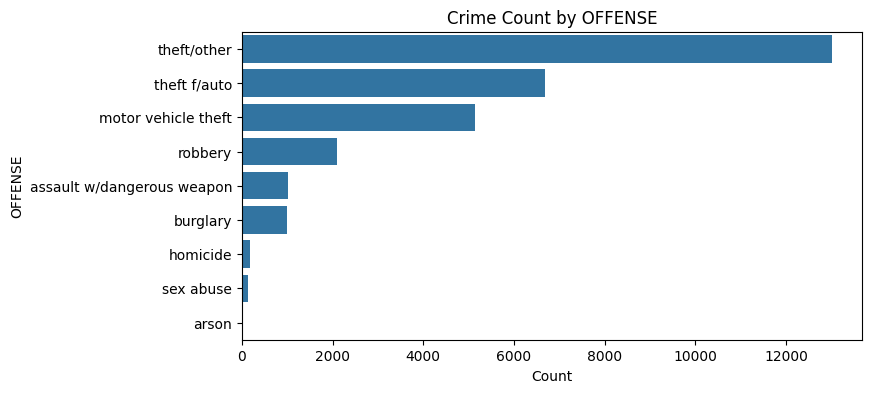

In [16]:
# --- 8b. OFFENSE distribution
if "OFFENSE" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y="OFFENSE", data=df, order=df["OFFENSE"].value_counts().index)
    plt.title("Crime Count by OFFENSE")
    plt.xlabel("Count")
    plt.ylabel("OFFENSE")
    plt.show()

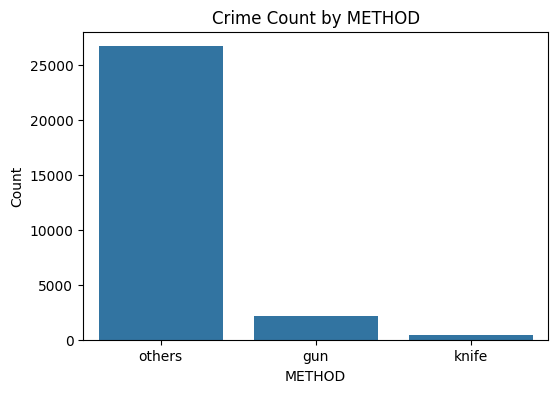

In [17]:
# --- 8c. METHOD distribution
if "METHOD" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="METHOD", data=df, order=df["METHOD"].value_counts().index)
    plt.title("Crime Count by METHOD")
    plt.xlabel("METHOD")
    plt.ylabel("Count")
    plt.show()

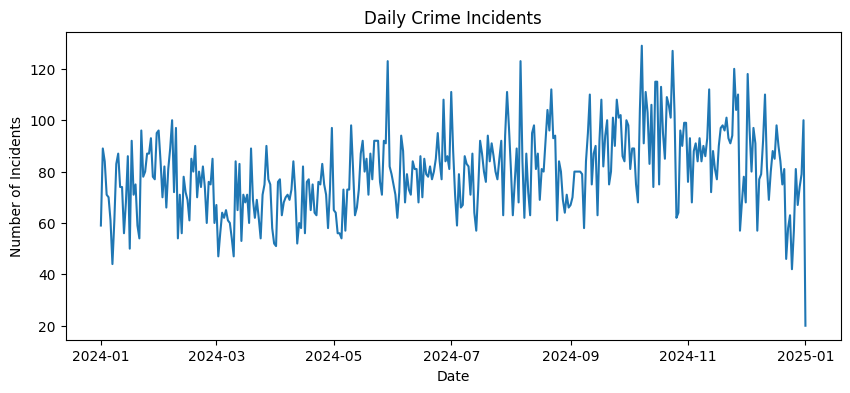

In [18]:
# =========================================
# 9. TIME-BASED ANALYSIS
# =========================================
if "REPORT_DAT" in df.columns:
    # Create a new column for date (without time)
    df["REPORT_DATE"] = df["REPORT_DAT"].dt.date

    # Plot daily crime count
    daily_counts = df.groupby("REPORT_DATE").size()
    plt.figure(figsize=(10,4))
    daily_counts.plot()
    plt.title("Daily Crime Incidents")
    plt.xlabel("Date")
    plt.ylabel("Number of Incidents")
    plt.show()

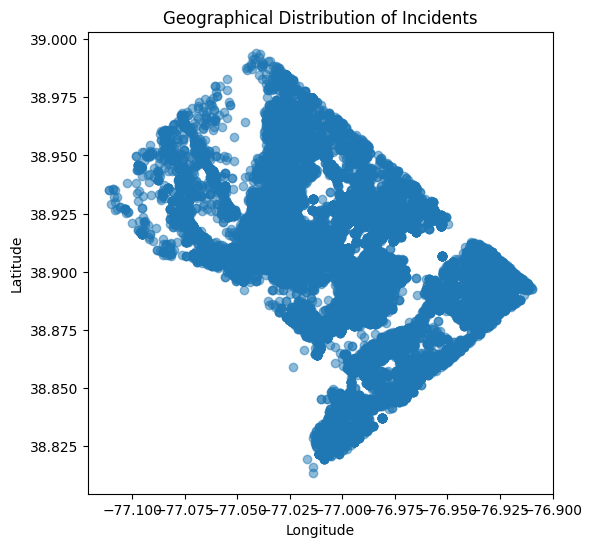

In [19]:
# =========================================
# 10. LOCATION-BASED ANALYSIS
# =========================================
# --- 10a. Quick scatter plot of latitude & longitude
if "LATITUDE" in df.columns and "LONGITUDE" in df.columns:
    plt.figure(figsize=(6,6))
    plt.scatter(df["LONGITUDE"], df["LATITUDE"], alpha=0.5)
    plt.title("Geographical Distribution of Incidents")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

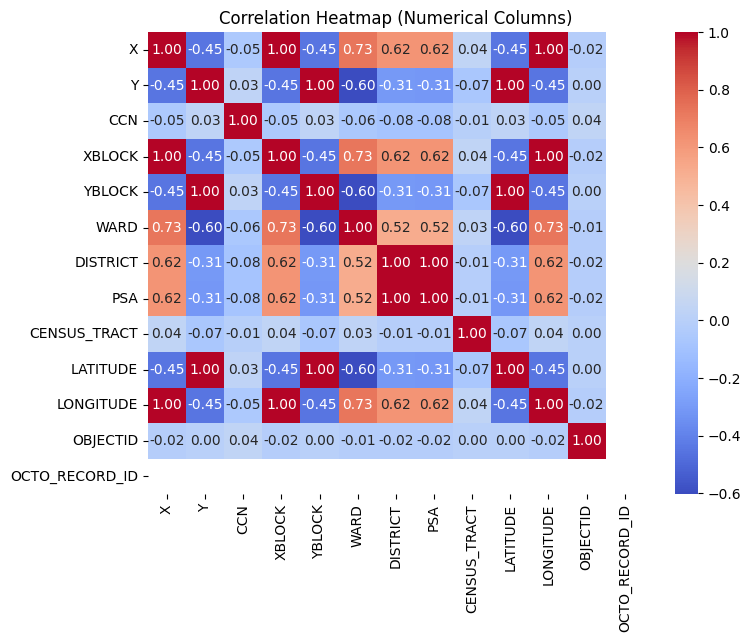

In [22]:
# =========================================
# 11. CORRELATION & HEATMAP (NUMERIC FIELDS)
# =========================================
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()

In [23]:
# Dropped last column
df.drop(columns=["OCTO_RECORD_ID"], inplace=True)

In [24]:
display(df.head())

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,REPORT_DATE
0,396384.27,137427.7600,24054605,2024-04-12 14:24:15+00:00,day,others,theft f/auto,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,golden triangle,2024-04-12 06:33:00+00:00,2024-04-12 08:59:00+00:00,666213423,2024-04-12
1,395709.91,137490.9400,24056000,2024-04-14 23:56:40+00:00,evening,others,theft/other,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024-04-14 04:00:00+00:00,NaT,666213424,2024-04-14
2,397497.55,137053.1300,24056385,2024-04-15 17:42:57+00:00,day,others,theft/other,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,downtown,2024-04-15 14:31:00+00:00,2024-04-15 15:18:00+00:00,666213769,2024-04-15
3,400040.61,129046.4721,18060158,2024-07-30 04:00:00+00:00,midnight,gun,homicide,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018-04-15 16:07:00+00:00,2018-04-15 17:34:56+00:00,666236835,2024-07-30
4,397171.11,137408.2500,24013789,2024-01-28 07:33:28+00:00,midnight,others,theft/other,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,downtown,2024-01-28 06:41:00+00:00,2024-01-28 07:12:00+00:00,666239683,2024-01-28


In [25]:

# =========================================
# 12. SAVE CLEANED DATA
# =========================================
# As made changes (like dropping duplicates/columns, imputing values, etc.),
# we can save the cleaned dataset for future use:
df.to_csv("Crime_Incidents_in_2024_Cleaned.csv", index=False)

print("\nEDA Complete!")



EDA Complete!
